In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from pandas import read_csv
from matplotlib import pyplot
from numpy import polyfit

C:\Users\strub\anaconda3\envs\prophet39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
df_prediction = pd.read_csv('series2_Nbeat.csv')
print(len(df_prediction))
series = pd.date_range(start='2018-01-02', end='2021-12-31', freq='D')
#
df_prediction['date'] = series
df_prediction = df_prediction.rename(columns={'yearly': 'season'})
df_prediction.tail()

1460


,date,y,trend,season
1455,2021-12-27,0.423217,0.508491,0.420339
1456,2021-12-28,0.378716,0.508581,0.467534
1457,2021-12-29,0.422169,0.508671,0.566761
1458,2021-12-30,0.522524,0.508761,0.640188
1459,2021-12-31,0.607167,0.508852,0.623979


### Modelieren Seasonality: 
https://machinelearningmastery.com/time-series-seasonality-with-python/

Coefficients: [-3.38552575e-15  3.13470030e-12 -9.50241950e-10  1.13555540e-07
 -9.79354689e-06  9.61390417e-04  5.07063884e-01]
1460
1460


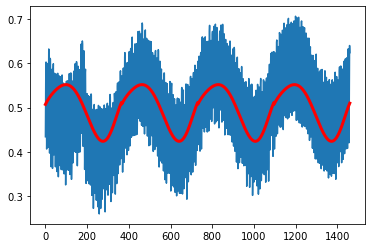

In [6]:
# yearly season.
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365.25 for i in range(0, len(df_prediction))]
y = df_prediction.season
degree = 6
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)
print(len(X))
print(len(y))
# create curve
yearly = list()
for i in range(len(X)):
	value = coef[-1]
	for d in range(degree):
		value += X[i]**(degree-d) * coef[d]
	yearly.append(value)
# plot curve over original data
pyplot.plot(df_prediction.season)
pyplot.plot(yearly, color='red', linewidth=3)
#pyplot.xlim(200,600)
pyplot.show()

Coefficients: [-6.06055629e-05  9.23693797e-04 -2.97861336e-03 -9.40816490e-03
  2.90815389e-02  7.52423720e-02  4.24344294e-01]


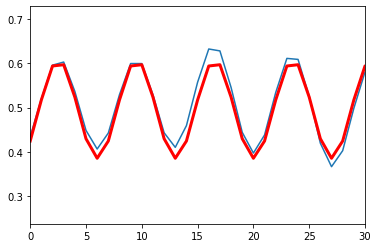

In [7]:
#weekly season
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X1 = [i%7 for i in range(0, len(df_prediction))]
y1 = df_prediction.season
degree = 6
coef1 = polyfit(X1, y1, degree)
print('Coefficients: %s' % coef1)
# create curve
weekly = list()
for i in range(len(X1)):
    value = coef1[-1]
    for d in range(degree):
        value += X1[i]**(degree-d) * coef1[d]
    weekly.append(value)
# plot curve over original data
pyplot.plot(df_prediction.season)
pyplot.plot(weekly, color='red', linewidth=3)
pyplot.xlim(0,30)
pyplot.show()

In [8]:
df_prediction['yearly'] = yearly
df_prediction['weekly'] = weekly
df_prediction.head()

,date,y,trend,season,yearly,weekly
0,2018-01-02,0.615439,0.590136,0.434002,0.507064,0.424344
1,2018-01-03,0.543240,0.589934,0.520162,0.508016,0.517145
2,2018-01-04,0.445598,0.589732,0.595808,0.508948,0.593912
3,2018-01-05,0.395379,0.589531,0.602832,0.509863,0.596793
4,2018-01-06,0.429151,0.589330,0.536523,0.510760,0.523593


In [9]:
df_prediction['trendN'] =  (df_prediction['trend'] - df_prediction['trend'] .min()) / (df_prediction['trend'].max() - df_prediction['trend'].min()) + 1
df_prediction['seasonN'] = (df_prediction['season'] - df_prediction['season'].min()) / (df_prediction['season'].max() - df_prediction['season'].min()) 
df_prediction['weeklyN'] = (df_prediction['weekly'] - df_prediction['weekly'].min()) / (df_prediction['weekly'].max() - df_prediction['weekly'].min()) 
df_prediction['yearlyN'] = (df_prediction['yearly'] - df_prediction['yearly'].min()) / (df_prediction['yearly'].max() - df_prediction['yearly'].min()) 
print(len(df_prediction))
df_prediction.head()  

1460


,date,y,trend,season,yearly,weekly,trendN,seasonN,weeklyN,yearlyN
0,2018-01-02,0.615439,0.590136,0.434002,0.507064,0.424344,2.000000,0.390444,0.184546,0.650812
1,2018-01-03,0.543240,0.589934,0.520162,0.508016,0.517145,1.998016,0.583274,0.623368,0.658243
2,2018-01-04,0.445598,0.589732,0.595808,0.508948,0.593912,1.996033,0.752575,0.986373,0.665525
3,2018-01-05,0.395379,0.589531,0.602832,0.509863,0.596793,1.994052,0.768296,1.000000,0.672665
4,2018-01-06,0.429151,0.589330,0.536523,0.510760,0.523593,1.992074,0.619892,0.653860,0.679668


In [14]:
# Load True Values
df_trueLong = pd.read_csv('../series2_weekly_complete.csv')
#df_true['season'] = df_true['trueYearly'] + df_true['trueMonthly']
#df_true['seasonN'] = (df_true['season'] - df_true['season'].min()) / (df_true['season'].max() - df_true['season'].min())
df_true = df_trueLong.iloc[732:2192].copy() 
#df_true['date'] = pd.to_datetime(df_true['date'])
print(len(df_true))
df_true.head()

1460


,date,trueYaddN,trueYmultN,trueYearly,trueYearlyN,trueMonthly,trueMonthlyN,trueTrend,trueTrendN,trueNoise
732,2018-01-02,0.464949,0.440360,1.034422,0.517211,0.041966,0.189156,303.7,1.538777,1.310545
733,2018-01-03,0.541113,0.561087,1.051620,0.525810,1.305063,0.630234,304.0,1.539312,1.021866
734,2018-01-04,0.606266,0.662729,1.068802,0.534402,2.338442,0.991094,304.3,1.539847,0.819487
735,2018-01-05,0.647455,0.702998,1.085965,0.542983,2.363946,1.000000,304.6,1.540382,1.312841
736,2018-01-06,0.523631,0.549245,1.103102,0.551551,1.362371,0.650246,304.9,1.540916,0.683741


# MAE FOR Yearly SEASONALITY

In [15]:
# Standardize Yearly Pred 
mean1 = sum(df_prediction['yearlyN']) / len(df_prediction)
standard_deviation1 = math.sqrt( sum((df_prediction['yearlyN'] - mean1)**2 ) / len(df_prediction))
df_prediction['yearlyS']= (df_prediction['yearlyN'] - mean1) / standard_deviation1
print(standard_deviation1)
print(mean1)
df_prediction.tail()

0.3521949856394015
0.5636966214225348


,date,y,trend,season,yearly,weekly,trendN,seasonN,weeklyN,yearlyN,yearlyS
1455,2021-12-27,0.423217,0.508491,0.420339,0.505461,0.385317,1.197523,0.359865,0.000000,0.638299,0.211820
1456,2021-12-28,0.378716,0.508581,0.467534,0.506620,0.424344,1.198405,0.465491,0.184546,0.647350,0.237520
1457,2021-12-29,0.422169,0.508671,0.566761,0.507746,0.517145,1.199291,0.687566,0.623368,0.656139,0.262476
1458,2021-12-30,0.522524,0.508761,0.640188,0.508836,0.593912,1.200178,0.851900,0.986373,0.664651,0.286642
1459,2021-12-31,0.607167,0.508852,0.623979,0.509889,0.596793,1.201067,0.815624,1.000000,0.672866,0.309970


In [16]:
# Standardize Yearly True
mean = sum(df_true['trueYearlyN']) / len(df_true)
standard_deviation = math.sqrt( sum((df_true['trueYearlyN'] - mean)**2 ) / len(df_true))
df_true['trueYearlyS']= (df_true['trueYearlyN'] - mean) / standard_deviation
print(standard_deviation)
print(mean)
df_true.tail()

0.3535566646303369
0.5000000000016709


,date,trueYaddN,trueYmultN,trueYearly,trueYearlyN,trueMonthly,trueMonthlyN,trueTrend,trueTrendN,trueNoise,trueYearlyS
2187,2021-12-27,0.396557,0.366862,0.948380,0.474190,-0.499712,5.750717e-10,559.2,1.994295,0.591832,-7.300124e-02
2188,2021-12-28,0.509969,0.512784,0.965578,0.482789,0.041966,1.891559e-01,560.0,1.995721,1.508898,-4.867951e-02
2189,2021-12-29,0.561928,0.653000,0.982787,0.491393,1.305063,6.302341e-01,560.8,1.997147,0.904003,-2.434336e-02
2190,2021-12-30,0.645526,0.806587,1.000000,0.500000,2.338442,9.910937e-01,561.6,1.998574,0.940978,-3.218693e-09
2191,2021-12-31,0.635107,0.800258,1.017213,0.508607,2.363946,1.000000e+00,562.4,2.000000,0.761115,2.434336e-02


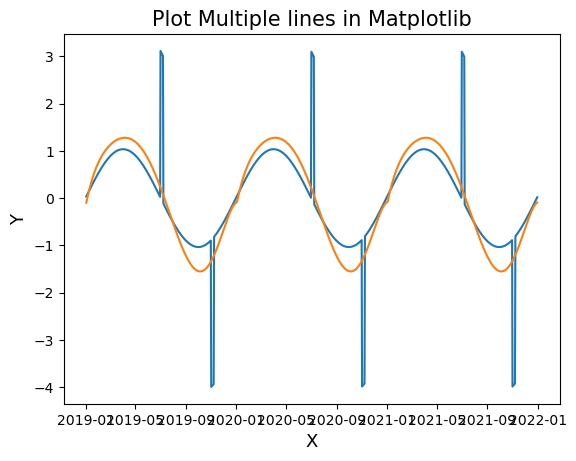

In [10]:
#Figure to compare actual and predicted yearly seasonality  

import matplotlib.pyplot as plt 

y1 = df_true['trueYearlyS']
y2 = df_prediction['yearlyS']
x1 = pd.to_datetime(df_true['date'])
x2 = pd.to_datetime(df_prediction['date'])

plt.plot(x1, y1)
plt.plot(x2, y2)

plt.title("Plot Multiple lines in Matplotlib",fontsize=15)
plt.xlabel("X",fontsize=13)
plt.ylabel("Y",fontsize=13)
#plt.legend()
plt.rcParams["figure.figsize"] = (16,12)
plt.show()

### MAE

In [17]:
y_true = df_true['trueYearlyS']
y_pred = df_prediction['yearlyS']
print("Mean Absolute Error:\n")
print(mean_absolute_error(y_true, y_pred))

Mean Absolute Error:

0.1315379853215942


### RMSE

In [12]:
mse=mean_squared_error(y_true, y_pred)
rmse = math.sqrt(mse)
print("Root Mean Square Error:\n")
print(rmse)

Root Mean Square Error:

0.6144926071867789


# MAE FOR Weekly SEASONALITY

In [13]:
# Standardize weekly Pred 
mean = sum(df_prediction['weeklyN']) / len(df_prediction)
standard_deviation = math.sqrt( sum((df_prediction['weeklyN'] - mean)**2 ) / len(df_prediction))
df_prediction['weeklyS']= (df_prediction['weeklyN'] - mean) / standard_deviation

df_prediction.tail()

,date,y,trend,season,yearly,weekly,trendN,seasonN,weeklyN,yearlyN,yearlyS,weeklyS
1090,2021-12-27,4.390947,4.567050,6.206472,6.269569,7.053280,1.001549,0.454489,0.800804,0.503884,-0.125614,0.878481
1091,2021-12-28,3.340657,4.565751,5.157480,6.281575,6.190105,1.001160,0.314417,0.356523,0.507432,-0.115584,-0.318764
1092,2021-12-29,2.813913,4.564456,4.632032,6.292074,5.497430,1.000772,0.244254,0.000000,0.510533,-0.106813,-1.279521
1093,2021-12-30,3.441232,4.563164,5.260643,6.300991,5.506197,1.000386,0.328192,0.004513,0.513168,-0.099363,-1.267360
1094,2021-12-31,5.084706,4.561875,6.905406,6.308253,6.204898,1.000000,0.547817,0.364137,0.515314,-0.093296,-0.298245


In [14]:
# Standardize weekly True

mean = sum(df_true['trueMonthlyN']) / len(df_true)
standard_deviation = math.sqrt( sum((df_true['trueMonthlyN'] - mean)**2 ) / len(df_true))
df_true['trueMonthlyS']= (df_true['trueMonthlyN'] - mean) / standard_deviation

df_true.tail()

,date,trueYaddN,trueYmultN,trueYearly,trueYearlyN,trueMonthly,trueMonthlyN,trueTrend,trueTrendN,trueNoise,trueYearlyS,trueMonthlyS
2187,2021-12-27,0.458799,4.782127,0.948380,0.554382,1.5,1.0,-31677.25,1.006832,1.310189,-5.341861e-02,1.157473
2188,2021-12-28,0.306463,3.035988,0.965578,0.556886,0.5,0.0,-31793.80,1.005126,0.557771,-3.562120e-02,-0.863951
2189,2021-12-29,0.354178,3.577583,0.982787,0.559392,0.5,0.0,-31910.45,1.003419,1.086309,-1.781324e-02,-0.863951
2190,2021-12-30,0.342260,3.439193,1.000000,0.561898,0.5,0.0,-32027.20,1.001710,0.934917,-2.355270e-09,-0.863951
2191,2021-12-31,0.360407,3.643537,1.017213,0.564405,0.5,0.0,-32144.05,1.000000,1.126324,1.781324e-02,-0.863951


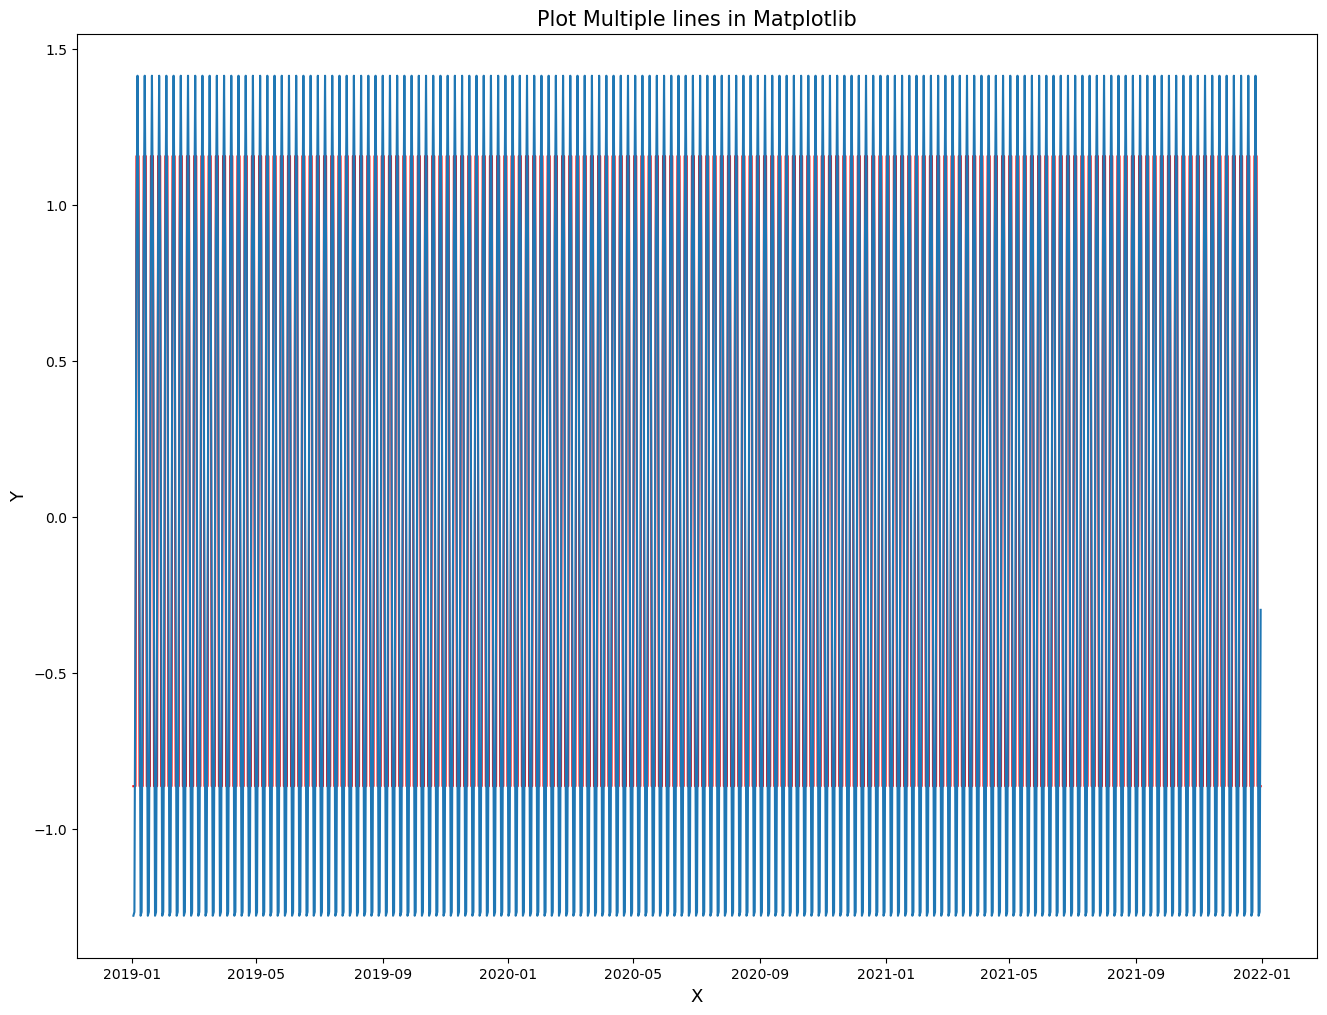

In [15]:
#Figure to compare actual and predictat weekly seasonality  

import matplotlib.pyplot as plt 

y1 = df_true['trueMonthlyS']
y2 = df_prediction['weeklyS']
x1 = pd.to_datetime(df_true['date'])
x2 = pd.to_datetime(df_prediction['date'])


plt.plot(x1, y1, color='red')
plt.plot(x2, y2)

plt.title("Plot Multiple lines in Matplotlib",fontsize=15)
plt.xlabel("X",fontsize=13)
plt.ylabel("Y",fontsize=13)
#plt.legend()
plt.rcParams["figure.figsize"] = (16,12)
#plt.xlim('2018-04-01','2018-04-15')
plt.show()

### MAE Weekly

In [16]:
y_true = df_true['trueMonthlyS']
y_pred = df_prediction['weeklyS']
print("Mean Absolute Error:\n")
print(mean_absolute_error(y_true, y_pred))

Mean Absolute Error:

0.39101726293777184


### RMSE Weekly

In [17]:
mse=mean_squared_error(y_true, y_pred)
rmse = math.sqrt(mse)
print("Root Mean Square Error:\n")
print(rmse)

Root Mean Square Error:

0.4088988451326799


# MAE FOR TREND 

In [18]:
# Standardize Trend Pred 

mean = sum(df_prediction['trendN']) / len(df_prediction)
standard_deviation = math.sqrt( sum((df_prediction['trendN'] - mean)**2 ) / len(df_prediction))
df_prediction['trendS']= (df_prediction['trendN'] - mean) / standard_deviation

df_prediction.head()

,date,y,trend,season,yearly,weekly,trendN,seasonN,weeklyN,yearlyN,yearlyS,trendS
0,2018-01-02,0.615439,0.590136,0.434002,0.507064,0.424344,2.000000,0.390444,0.184546,0.650812,0.247351,2.685158
1,2018-01-03,0.543240,0.589934,0.520162,0.508016,0.517145,1.998016,0.583274,0.623368,0.658243,0.268448,2.678044
2,2018-01-04,0.445598,0.589732,0.595808,0.508948,0.593912,1.996033,0.752575,0.986373,0.665525,0.289126,2.670934
3,2018-01-05,0.395379,0.589531,0.602832,0.509863,0.596793,1.994052,0.768296,1.000000,0.672665,0.309399,2.663832
4,2018-01-06,0.429151,0.589330,0.536523,0.510760,0.523593,1.992074,0.619892,0.653860,0.679668,0.329281,2.656738


In [19]:
# Standardize Trend True 

mean = sum(df_true['trueTrendN']) / len(df_true)
standard_deviation = math.sqrt( sum((df_true['trueTrendN'] - mean)**2 ) / len(df_true))
df_true['trueTrendS']= (df_true['trueTrendN'] - mean) / standard_deviation

df_true.tail()

,date,trueYaddN,trueYmultN,trueYearly,trueYearlyN,trueMonthly,trueMonthlyN,trueTrend,trueTrendN,trueNoise,trueYearlyS,trueTrendS
2187,2021-12-27,0.396557,0.366862,0.948380,0.474190,-0.499712,5.750717e-10,559.2,1.994295,0.591832,-7.300124e-02,2.688231
2188,2021-12-28,0.509969,0.512784,0.965578,0.482789,0.041966,1.891559e-01,560.0,1.995721,1.508898,-4.867951e-02,2.695628
2189,2021-12-29,0.561928,0.653000,0.982787,0.491393,1.305063,6.302341e-01,560.8,1.997147,0.904003,-2.434336e-02,2.703026
2190,2021-12-30,0.645526,0.806587,1.000000,0.500000,2.338442,9.910937e-01,561.6,1.998574,0.940978,-3.218693e-09,2.710423
2191,2021-12-31,0.635107,0.800258,1.017213,0.508607,2.363946,1.000000e+00,562.4,2.000000,0.761115,2.434336e-02,2.717821


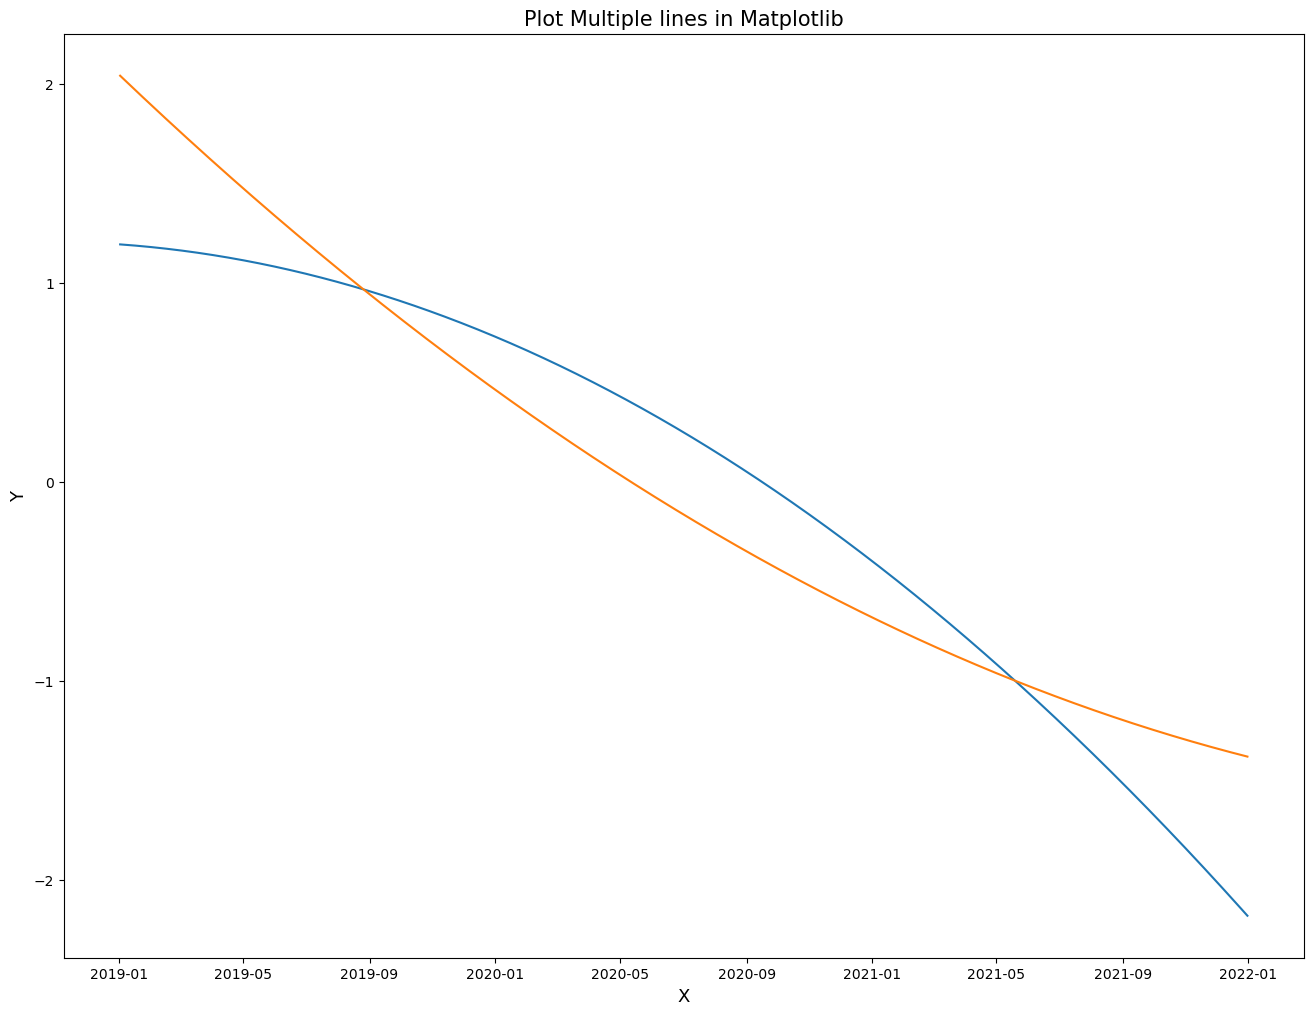

In [20]:
import matplotlib.pyplot as plt 

y1 = df_true['trueTrendS']
y2 = df_prediction['trendS']
x1 = pd.to_datetime(df_true['date'])
x2 = pd.to_datetime(df_prediction['date'])


plt.plot(x1, y1)
plt.plot(x2, y2)

plt.title("Plot Multiple lines in Matplotlib",fontsize=15)
plt.xlabel("X",fontsize=13)
plt.ylabel("Y",fontsize=13)
#plt.legend()
plt.rcParams["figure.figsize"] = (16,12)
plt.show()

### MAE Trend

In [20]:
y_true = df_true['trueTrendS']
y_pred = df_prediction['trendS']
print("Mean Absolute Error:\n")
print(mean_absolute_error(y_true, y_pred))

Mean Absolute Error:

1.1836550561132277


### RMSE Trend

In [22]:
mse=mean_squared_error(y_true, y_pred)
rmse = math.sqrt(mse)
print("Root Mean Square Error:\n")
print(rmse)

Root Mean Square Error:

0.3697631857395743


# MAE for Seasonality

In [23]:
# Standardize Season Pred 

a='seasonN'

mean = sum(df_prediction[a]) / len(df_prediction)
standard_deviation = math.sqrt( sum((df_prediction[a] - mean)**2 ) / len(df_prediction))
df_prediction['SeasonS']= (df_prediction[a] - mean) / standard_deviation

df_prediction.head()

,date,y,trend,season,yearly,weekly,trendN,seasonN,weeklyN,yearlyN,yearlyS,weeklyS,trendS,SeasonS
0,2019-01-02,6.459910,7.903672,4.938814,6.302128,5.497430,2.000000,0.285218,0.000000,0.513504,-0.098413,-1.279521,2.041212,-0.987861
1,2019-01-03,6.964594,7.898852,5.448317,6.352447,5.506197,1.998558,0.353252,0.004513,0.528372,-0.056374,-1.267360,2.036275,-0.648035
2,2019-01-04,7.660090,7.894034,6.148631,6.401355,6.204898,1.997116,0.446765,0.364137,0.542822,-0.015513,-0.298245,2.031341,-0.180945
3,2019-01-05,8.125772,7.889221,6.619126,6.448893,7.060412,1.995676,0.509590,0.804474,0.556868,0.024203,0.888373,2.026410,0.132863
4,2019-01-06,8.043207,7.884410,6.541373,6.495100,7.440291,1.994236,0.499208,1.000000,0.570520,0.062806,1.415274,2.021483,0.081004


In [21]:
df_prediction.to_csv('NBeatsSeries2.csv',index=False)

In [24]:
# Standardize Season True 

df_true['trueSeason']=df_true['trueYearly'] + df_true['trueMonthly']
df_true['trueSeasonN'] = (df_true['trueSeason'] - df_true['trueSeason'].min()) / (df_true['trueSeason'].max() - df_true['trueSeason'].min()) 

a='trueSeasonN'

mean = sum(df_true[a]) / len(df_true)
standard_deviation = math.sqrt( sum((df_true[a] - mean)**2 ) / len(df_true))
df_true['trueSeasonS']= (df_true[a] - mean) / standard_deviation

df_true.tail()

,date,trueYaddN,trueYmultN,trueYearly,trueYearlyN,trueMonthly,trueMonthlyN,trueTrend,trueTrendN,trueNoise,trueYearlyS,trueMonthlyS,trueTrendS,trueSeason,trueSeasonN,trueSeasonS
2187,2021-12-27,0.458799,4.782127,0.948380,0.554382,1.5,1.0,-31677.25,1.006832,1.310189,-5.341861e-02,1.157473,-2.158490,2.448380,0.611023,0.479915
2188,2021-12-28,0.306463,3.035988,0.965578,0.556886,0.5,0.0,-31793.80,1.005126,0.557771,-3.562120e-02,-0.863951,-2.164271,1.465578,0.486102,-0.425415
2189,2021-12-29,0.354178,3.577583,0.982787,0.559392,0.5,0.0,-31910.45,1.003419,1.086309,-1.781324e-02,-0.863951,-2.170056,1.482787,0.488289,-0.409563
2190,2021-12-30,0.342260,3.439193,1.000000,0.561898,0.5,0.0,-32027.20,1.001710,0.934917,-2.355270e-09,-0.863951,-2.175847,1.500000,0.490477,-0.393706
2191,2021-12-31,0.360407,3.643537,1.017213,0.564405,0.5,0.0,-32144.05,1.000000,1.126324,1.781324e-02,-0.863951,-2.181642,1.517213,0.492665,-0.377850


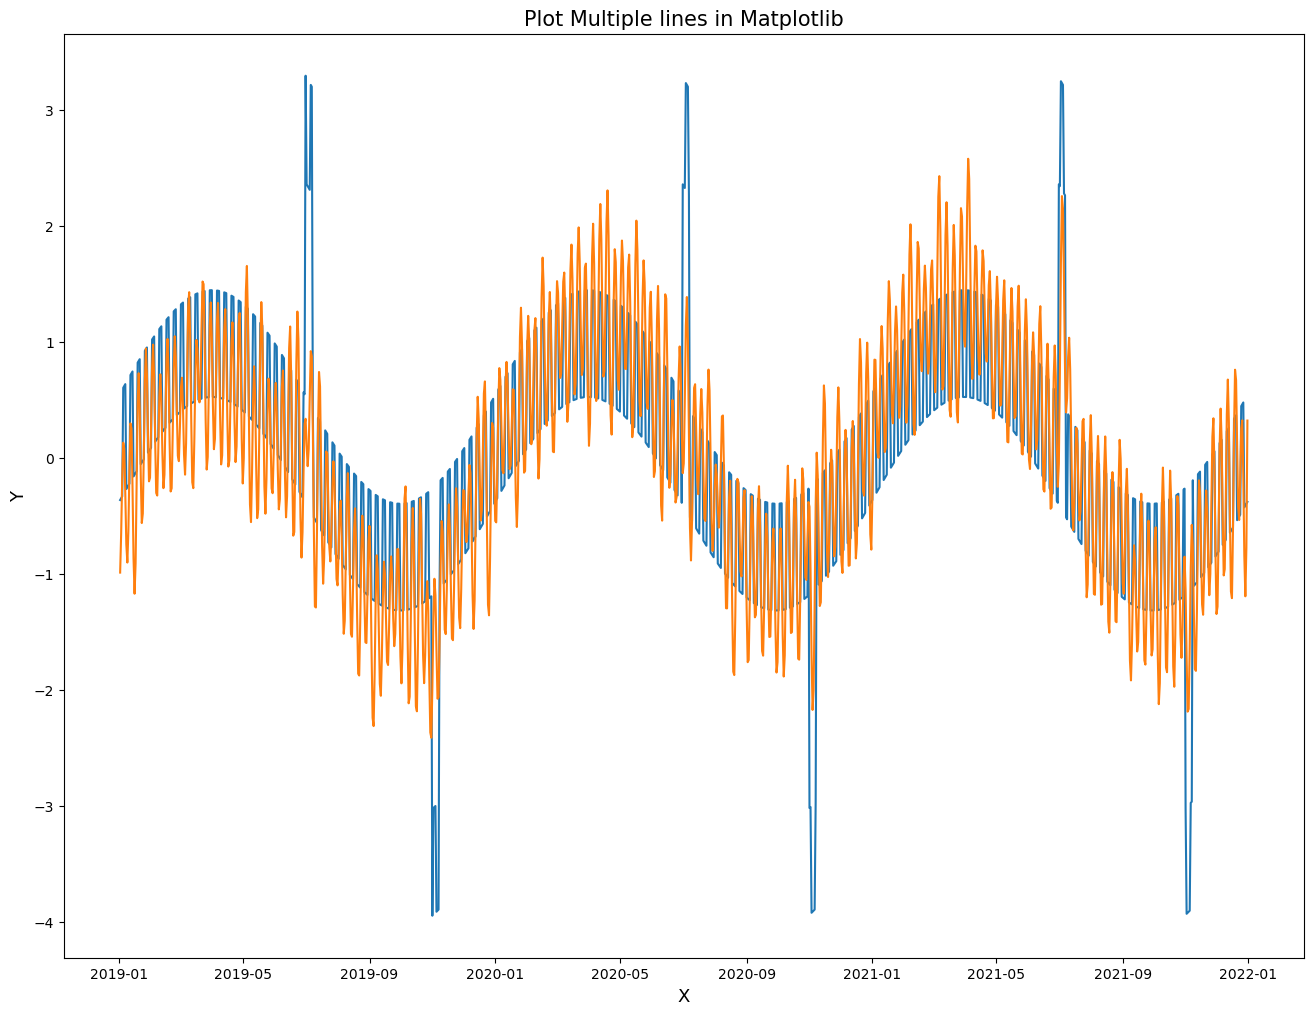

In [25]:
import matplotlib.pyplot as plt 

y1 = df_true['trueSeasonS']
y2 = df_prediction['SeasonS']
x1 = pd.to_datetime(df_true['date'])
x2 = pd.to_datetime(df_prediction['date'])


plt.plot(x1, y1)
plt.plot(x2, y2)

plt.title("Plot Multiple lines in Matplotlib",fontsize=15)
plt.xlabel("X",fontsize=13)
plt.ylabel("Y",fontsize=13)
#plt.legend()
plt.rcParams["figure.figsize"] = (16,12)
plt.show()

In [26]:
y_true = df_true['trueSeasonS']
y_pred = df_prediction['SeasonS']
print("Mean Absolute Error:\n")
print(mean_absolute_error(y_true, y_pred))

Mean Absolute Error:

0.4066188360915773


In [27]:
mse=mean_squared_error(y_true, y_pred)
rmse = math.sqrt(mse)
print("Root Mean Square Error:\n")
print(rmse)

Root Mean Square Error:

0.5749440621945935
